# Principal Component Analysis (PCA) in Python

## Purpose/Objective of the Lab

The primary objective of this lab is to provide a hands-on learning experience in understanding and implementing Principal Component Analysis (PCA), a powerful statistical technique used for dimensionality reduction, feature extraction, and data visualization.



This lab has the following key objectives:

- Hands-On Practice with Synthetic Data: Before diving into real-world data, you will first apply PCA to a synthetic dataset. This step will help you understand how PCA transforms data and the impact of dimensionality reduction on data interpretation and visualization.

- Applying PCA to Real-World Data: The lab will then move to a real-world dataset (such as the Iris dataset) to show how PCA can be used in practical data analysis. The Iris dataset, known for its simplicity and effectiveness in illustrating machine learning concepts, will serve as a perfect example for demonstrating how PCA simplifies data without losing essential information.

- Leveraging scikit-learn for PCA: Alongside implementing PCA from scratch, you will learn to use scikit-learn's PCA module. This approach will provide you with insights into how PCA can be efficiently implemented and applied in real-world machine learning pipelines.

By the end of this lab, you will not only understand the theoretical aspects of PCA but will also be skilled in applying it using Python and scikit-learn. You will be prepared to use PCA in various data analysis, machine learning, and data visualization tasks.

## 1. Generating a Three-Dimensional Dataset

Let's create a synthetic three-dimensional dataset for demonstrating PCA. We will make use of the make_blobs function from scikit-learn's datasets module. This function is useful for generating isotropic Gaussian blobs for clustering, and we can tailor it to produce a 3D dataset.

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the dataset
n_samples = 100
n_features = 3
n_centers = 4

# Generating synthetic data
X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_centers, random_state=42)

# Overview
print("Shape of the dataset: ", X.shape)

/Users/adilmehmoodkhan/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Shape of the dataset:  (100, 3)


## 2. Plotting the 3D Dataset

Next, let's visualize this three-dimensional data. We'll use matplotlib's Axes3D to create a 3D scatter plot.

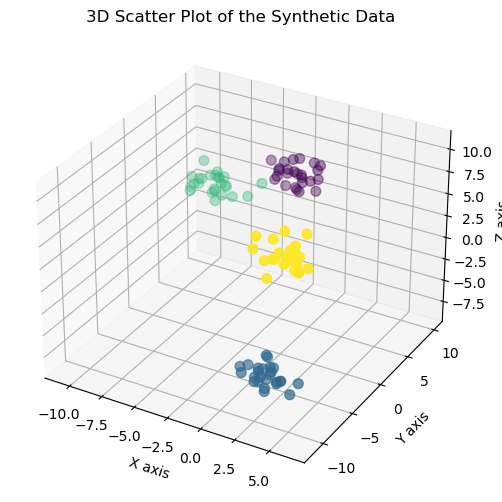

In [2]:
# Creating a 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=50)

# Labelling axes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Title
ax.set_title('3D Scatter Plot of the Synthetic Data')

# Show plot
plt.show()

## 2. Implementing and Applying PCA to the 3D Dataset from Scratch

Now that we havegenerated and visualized the three-dimensional dataset, the next step is to apply PCA to this data, which you will implement from sctratch, following the description of the alogorithm from your lecture notes.

Shape of reduced dataset:  (100, 2)


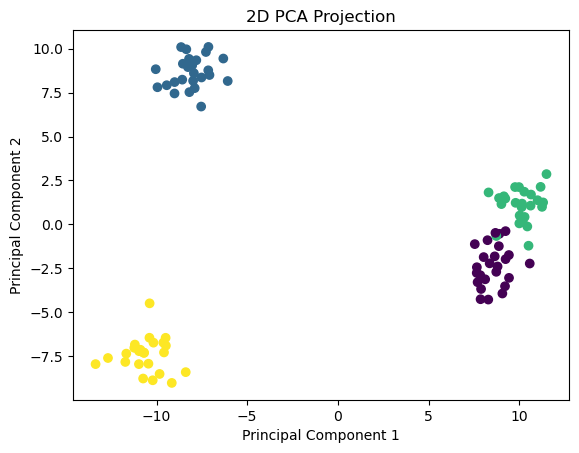

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# 1. Centering the data (subtract the mean of the data from the data) 
#    you can use np.mean to compute mean (https://numpy.org/doc/stable/reference/generated/numpy.mean.html)
# Write your code below


# 2. Compute the covariance matrix of the centered data.
#    The covariance matrix describes how the features vary with respect to each other.
#    you can use np.cov to compute the covariance matrix
#    https://numpy.org/doc/stable/reference/generated/numpy.cov.html
# Write your code below



# 3. Compute eigenvalues and eigenvectors
# Use np.linalg.eigh to compute the eigenvalues and eigenvectors of the covariance matrix.
# Eigenvectors represent the directions of the new feature axes, and eigenvalues tell you the variance explained by each principal component.
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html
# Write your code below



# 4. Sort eigenvalues and eigenvectors in decreasing order
# you can use np.argsort:
# https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
# This function returns the indices that would sort an array in ascending order. 
# Using [::-1] reverses the order to sort in descending order.
# Write your code below




# 5. Select the top 2 eigenvectors
# Provided that you have correctly imeplemented the above part and stored the sorted 
# eigen vectors as sorted_eigenvectors, the following code should work

n_components = 2
eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

# 6. Transform the data (project the centered data onto the new eigenvector basis) 
# and save the output as X_reduced
X_reduced = np.dot(X_centered, eigenvector_subset)

# Overview of transformed data
print("Shape of reduced dataset: ", X_reduced.shape)

# Plot the transformed data (2D projection)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.title("2D PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Congrats!! You have successfully implemented and applied PCA on your generated synthetic data and reduces it to 2 dimensions for visualization

## 3. Implementing and applying PCA using sklearn

To apply PCA using sklearn instead of implementing it from scratch, you can use the PCA class provided by the library.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Shape of reduced dataset:  (100, 2)


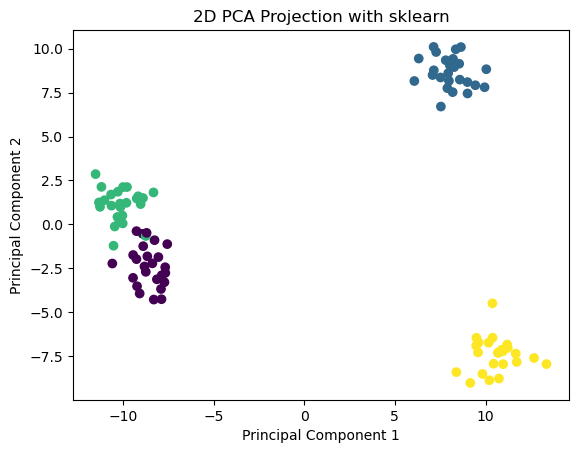

Explained variance ratio:  [0.69194846 0.27198654]


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Centering is automatically done by PCA in sklearn, so no need to manually subtract the mean

# 2. Apply PCA from sklearn
n_components = 2  # Reducing to 2 components for visualization
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X)  # Fit and transform the data

# Overview of transformed data
print("Shape of reduced dataset: ", X_reduced.shape)

# 3. Plot the transformed data (2D projection)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.title("2D PCA Projection with sklearn")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 4. Explained variance ratio (to see how much variance is captured by each principal component)
print("Explained variance ratio: ", pca.explained_variance_ratio_)


If the plots are similar but seem flipped/mirrored, think about why that might be the case.

## 4. PCA on Iris Data

In this section, you will apply PCA (from sklearn or your own implementation) to the Iris dataset. Use previous labs to see what is Iris data and how to use it in your code.

### 4.1 Load the Iris Data from sklean.datasets

In [5]:
# write your code below
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_data = iris.data
iris_target = iris.target
iris_feature_names = iris.feature_names
iris_target_names = iris.target_names

# Creating a DataFrame for better visualization
iris_df = pd.DataFrame(iris_data, columns=iris_feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris_target, iris_target_names)

# Display the first few rows of the DataFrame
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### 4.2 Standardise the data using StandardScalar

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

In [6]:
# write your code below
from sklearn.preprocessing import StandardScaler


Standardized data (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### 4.3 Apply PCA (n_components = 2)

In [7]:
# Your code below


PCA-transformed data (first 5 rows):
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


### 4.4 Visualise the transformed data

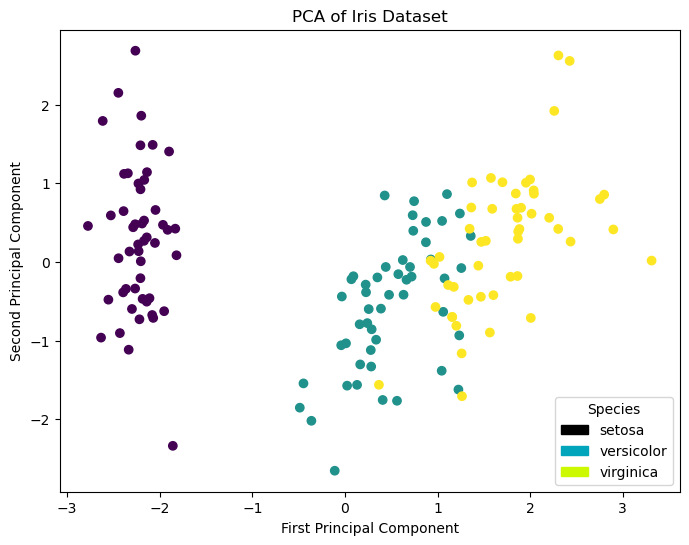

In [9]:
# write your code below
